## DECISION TREE CLASSIFIER ALGORITHM

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Step 1: Load the CSV dataset

Data = pd.read_csv('emotion.csv', usecols=['Text','Emotion'])
Data.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [3]:
Data.tail()

,Emotion,Text
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."
34791,sadness,"I think about you baby, and I dream about you ..."


In [4]:
Data['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [6]:
# Define preprocess function for text preprocessing

def preprocess_text(text):
    
    # Check for NaN values and handle them
    
    if pd.isnull(text):
        return ""
    
    # Convert to lowercase
    
    text = text.lower()
    
    # Remove special characters and digits
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization and remove stop words
    
    stop_words = set(stopwords.words('english'))
    
    words = [word for word in word_tokenize(text) if word not in stop_words]
    
    # Stemming
    
    ps = PorterStemmer()
    
    words = [ps.stem(word) for word in words]
    
    # Join the preprocessed words back into a single string
    
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [7]:
# Step 2: Data Preprocessing

Data['Text'] = Data['Text'].apply(preprocess_text)

In [8]:
# Step 3: Feature Extraction (TF-IDF)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
x1 = tfidf_vectorizer.fit_transform(Data['Text'])

In [9]:
# Assuming you have a column named 'label' containing the target labels

y1 = Data['Emotion']

In [10]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)

print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({'joy': 11045, 'sadness': 6722, 'fear': 5410, 'anger': 4297, 'surprise': 4062, 'neutral': 2254, 'disgust': 856, 'shame': 146})
OVER SAMPLING DATA COUNT  :  Counter({'neutral': 11045, 'joy': 11045, 'sadness': 11045, 'fear': 11045, 'surprise': 11045, 'anger': 11045, 'shame': 11045, 'disgust': 11045})


In [11]:
# Step 5: Splitting Data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
# Step 6: Machine Learning Model (Naive Bayes)

DTC = DecisionTreeClassifier()

In [14]:
# Step 7: Training the Model

DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
# Step 8: Evaluation

predicted = DTC.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score

AC = accuracy_score(y_test,predicted)

print("THE ACCURACY SCORE OF DECISION TREE CLASSIFIER IS :",AC*100)

THE ACCURACY SCORE OF DECISION TREE CLASSIFIER IS : 89.06179266636487


In [17]:
from sklearn.metrics import hamming_loss

HL = hamming_loss(y_test,predicted)

print("THE HAMMING LOSS OF  DECISION TREE CLASSIFIER IS :",HL*100)

THE HAMMING LOSS OF  DECISION TREE CLASSIFIER IS : 10.938207333635129


In [19]:
from sklearn.metrics import precision_score

PR = precision_score(y_test,predicted, average='weighted')

print('THE PRECISION SCORE OF  DECISION TREE CLASSIFIER:\n\n',PR*100)

THE PRECISION SCORE OF  DECISION TREE CLASSIFIER:

 88.62061266828134


In [20]:
from sklearn.metrics import recall_score

RE = recall_score(y_test,predicted, average='weighted')

print('THE RECALL SCORE OF  DECISION TREE CLASSIFIER:\n\n',RE*100)

THE RECALL SCORE OF  DECISION TREE CLASSIFIER:

 89.06179266636487


In [21]:
from sklearn.metrics import f1_score

F1 = f1_score(y_test,predicted, average='weighted')

print('THE F1 SCORE OF  DECISION TREE CLASSIFIER:\n\n',F1*100)

THE F1 SCORE OF  DECISION TREE CLASSIFIER:

 88.6376195441014


In [22]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test,predicted)

print('THE CONFUSION MATRIX SCORE OF  DECISION TREE CLASSIFIER:\n\n\n',CM)

THE CONFUSION MATRIX SCORE OF  DECISION TREE CLASSIFIER:


 [[2046    7   16   49   25   46    0   14]
 [   0 2189    0    0    2    0    0    0]
 [  32    7 2109   69    8   46    0   46]
 [ 138   64  119 1285  126  256    2  196]
 [   1    0    1    4 2160    0    0    0]
 [  81   29   67  204   37 1685    0   82]
 [   0    0    0    0    0    0 2201    0]
 [  18   10   13   74   13   31    0 2064]]


THE CONFUSION MATRIX SCORE OF  DECISION TREE CLASSIFIER:


[[2046    7   16   49   25   46    0   14]
 [   0 2189    0    0    2    0    0    0]
 [  32    7 2109   69    8   46    0   46]
 [ 138   64  119 1285  126  256    2  196]
 [   1    0    1    4 2160    0    0    0]
 [  81   29   67  204   37 1685    0   82]
 [   0    0    0    0    0    0 2201    0]
 [  18   10   13   74   13   31    0 2064]]


DISPLAY CONFUSION MATRIX OF  DECISION TREE CLASSIFIER: 




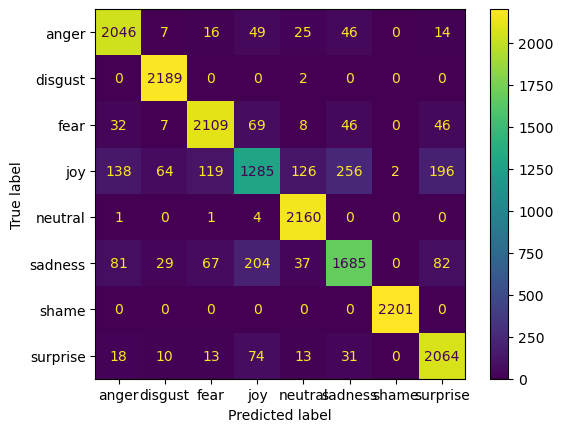

In [23]:
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF  DECISION TREE CLASSIFIER:\n\n')
print(cm)
print("\n\nDISPLAY CONFUSION MATRIX OF  DECISION TREE CLASSIFIER: \n\n")

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted, labels=DTC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DTC.classes_)
disp.plot()
plt.show()


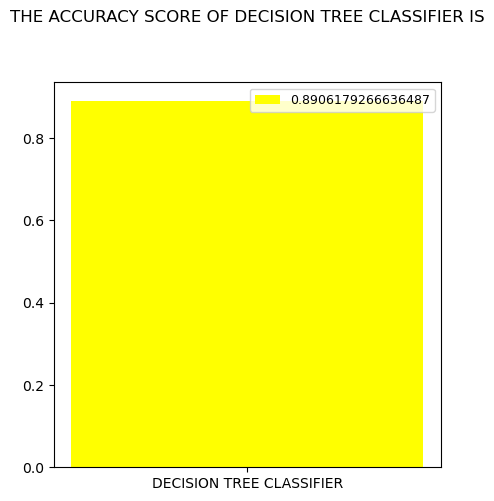

In [24]:
def graph():
    import matplotlib.pyplot as plt
    data=[AC]
    alg="DECISION TREE CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("YELLOW"))
    plt.title("THE ACCURACY SCORE OF DECISION TREE CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()